<a href="https://colab.research.google.com/github/YaminaDJOUDI/CNN/blob/master/B_Steps_D_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf


In [2]:
#upload googlec colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
# Importing librar

import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [4]:
# Create path
train_loc = '/content/drive/MyDrive/Data_Devided/train'
test_loc = '/content/drive/MyDrive/Data_Devided/test'

In [5]:
# resize images 
trdata=ImageDataGenerator(rescale = 1./255,
                          shear_range = 0.2,
                          zoom_range = 0.2,
                          horizontal_flip = True,)

traindata=trdata.flow_from_directory(directory=train_loc, target_size=(224,224)) #color_mode='grayscale'

tsdata=ImageDataGenerator(rescale = 1./255,
                          shear_range = 0.2,
                          zoom_range = 0.2,
                          horizontal_flip = True,)

testdata=tsdata.flow_from_directory(directory=test_loc, target_size=(224,224))

Found 273 images belonging to 2 classes.
Found 90 images belonging to 2 classes.


In [6]:
traindata.class_indices

{'abnormal': 0, 'normal': 1}

In [7]:
# define input image
input_shape = (224,224,3)

# create the Network
# Input layer
img_imput = Input(shape  = input_shape, name = 'img_input')

# Convo layers
x = Conv2D(32, (3,3) , padding = 'same' , activation='relu', name = 'layer_1') (img_imput)
x = Conv2D(64, (3,3) , padding = 'same' , activation='relu', name = 'layer_2') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_3') (x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3,3) , padding = 'same' , activation='relu', name = 'layer_4') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_5') (x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3,3) , padding = 'same' , activation='relu', name = 'layer_6') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_7') (x)
x = Dropout(0.25)(x)

x = Flatten(name = 'fc_1')(x)
x= Dense(64, name = 'lyaer_8')(x)
x = Dropout(0.5) (x)
x = Dense(2, activation='sigmoid', name='predictions')(x)


In [8]:
# Generate the model
model = Model(inputs = img_imput, outputs =x , name='Binary_classification')

In [9]:
# Print network structure
model.summary()

Model: "Binary_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_input (InputLayer)       [(None, 224, 224, 3)]     0         
_________________________________________________________________
layer_1 (Conv2D)             (None, 224, 224, 32)      896       
_________________________________________________________________
layer_2 (Conv2D)             (None, 224, 224, 64)      18496     
_________________________________________________________________
layer_3 (MaxPooling2D)       (None, 112, 112, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
layer_4 (Conv2D)             (None, 112, 112, 64)      36928     
_________________________________________________________________
layer_5 (MaxPooling2D)       (None, 56, 56, 6

In [10]:
# Compiling the model
model.compile(optimizer='adam', loss=binary_crossentropy, metrics=['accuracy'])

In [12]:
# start Train/Test
batch_size = 32
hist = model.fit(traindata, steps_per_epoch = traindata.samples//batch_size,
                 validation_data = testdata,validation_steps = testdata.samples//batch_size,
                 epochs = 10
                 )

Epoch 1/10
8/8 [==============================] - 129s 15s/step - loss: 1.3543 - accuracy: 0.7469 - val_loss: 0.6388 - val_accuracy: 0.8281
Epoch 2/10
8/8 [==============================] - 89s 11s/step - loss: 0.4397 - accuracy: 0.8631 - val_loss: 0.3470 - val_accuracy: 0.8906
Epoch 3/10
8/8 [==============================] - 92s 11s/step - loss: 0.3170 - accuracy: 0.8789 - val_loss: 0.3969 - val_accuracy: 0.8750
Epoch 4/10
8/8 [==============================] - 88s 11s/step - loss: 0.2287 - accuracy: 0.8963 - val_loss: 0.4048 - val_accuracy: 0.8906
Epoch 5/10
8/8 [==============================] - 87s 11s/step - loss: 0.1882 - accuracy: 0.9295 - val_loss: 0.3121 - val_accuracy: 0.8750
Epoch 6/10
8/8 [==============================] - 88s 11s/step - loss: 0.2069 - accuracy: 0.9129 - val_loss: 0.3868 - val_accuracy: 0.8906
Epoch 7/10
8/8 [==============================] - 90s 11s/step - loss: 0.1943 - accuracy: 0.9336 - val_loss: 0.2025 - val_accuracy: 0.9844
Epoch 8/10
8/8 [==========

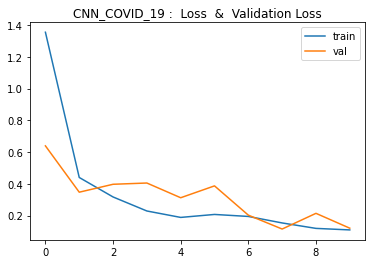

In [13]:
plt.plot(hist.history['loss'], label = 'train')
plt.plot(hist.history['val_loss'], label = 'val')
plt.title('CNN_COVID_19 :  Loss  &  Validation Loss')
plt.legend()
plt.show()

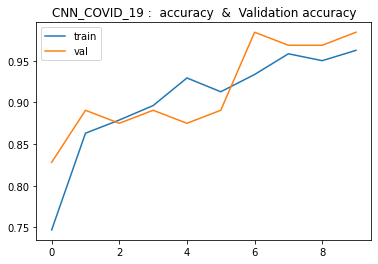

In [14]:
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'val')
plt.title('CNN_COVID_19 :  accuracy  &  Validation accuracy')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


confusion_matrix
[[22 23]
 [24 21]]
class_report
              precision    recall  f1-score   support

    Abnormal       0.48      0.49      0.48        45
      Normal       0.48      0.47      0.47        45

    accuracy                           0.48        90
   macro avg       0.48      0.48      0.48        90
weighted avg       0.48      0.48      0.48        90



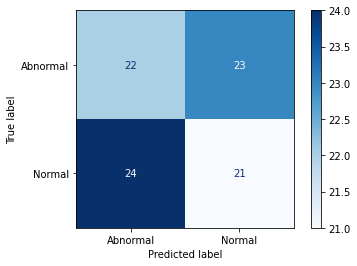

In [33]:
# Confusion Matrix  & Pres  & Recall   & F1-Score
target_name=['Abnormal','Normal']
label_names=[0,1]

Y_pred = model.predict_generator(testdata)
y_pred = np.argmax(Y_pred, axis=1)

cm=confusion_matrix(testdata.classes, y_pred, labels=label_names)

print('confusion_matrix')
print(confusion_matrix(testdata.classes, y_pred))
print('class_report')
print(classification_report(testdata.classes,y_pred, target_names=target_name))

disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=target_name)
disp = disp.plot(cmap=plt.cm.Blues, values_format = 'g')
plt.show()
